<a href="https://colab.research.google.com/github/SaketMunda/certifications/blob/master/tensorflow_developer_cert_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Developer Certificate Exam Practice

This notebook covers the practice of topics mentioned in [TensorFlow Candidate Handbook](https://www.tensorflow.org/static/extras/cert/TF_Certificate_Candidate_Handbook.pdf) for the tensorflow developer certification.


## (1) Build and train neural network models using TensorFlow 2.x

You need to understand the foundational principles of machine learning (ML) and deep learning (DL) using TensorFlow 2.x. You need to know how to:

- [x]  Use TensorFlow 2.x.
- [x]  Build, compile and train machine learning (ML) models using TensorFlow.
- [ ]  Preprocess data to get it read for use in a model.
- [x]  Use the models to predict results.
- [x]  Build sequential models with multiple layers.
- [x]  Build and train models for binary classification.
- [x]  Build and train models for multi-class classification.
- [x]  Plot loss and accuracy of a trained model.
- [x]  Identify strategies to prevent overfitting, including augmentation and dropout.
- [ ]  Use pretrained models (transfer learning).
- [ ]  Extract features from pre-trained models.
- [ ]  Ensure that inputs to a model are in the correct shape.
- [ ]  Ensure that you can match test data to the input shape of a neural network.
- [ ]  Ensure you can match output data of a neural network to specified input shape for test data.
- [ ]  Understand batch loading of data.
- [ ]  Use callbacks to trigger the end of training cycles.
- [ ]  Use datasets from different sources.
- [ ]  Use datasets in different formats, including json and csv.
- [ ]  Use datasets from tf.data.datasets.

### Use TensorFlow 2.x

In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

### Build, compile and train machine learning (ML) models using TensorFlow.

For this we can create our own dataset using Scikit-Learn's datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [ ]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=17)

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check the values
X[:10], y[:10]

(array([[-0.69661282, -0.32845725],
        [ 0.95581012, -0.05841444],
        [ 0.53469756, -0.57338982],
        [-0.89332834,  0.42098993],
        [-0.65647965, -0.4353153 ],
        [ 0.61190346,  0.8002305 ],
        [-0.59835762, -0.56745289],
        [ 0.33167887,  0.92232011],
        [ 0.78275051, -0.13574349],
        [ 0.57968601,  0.84258556]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))

In [ ]:
# let's visualize the data
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})

circles.head()

,X0,X1,label
0,-0.696613,-0.328457,1
1,0.955810,-0.058414,0
2,0.534698,-0.573390,1
3,-0.893328,0.420990,0
4,-0.656480,-0.435315,1


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

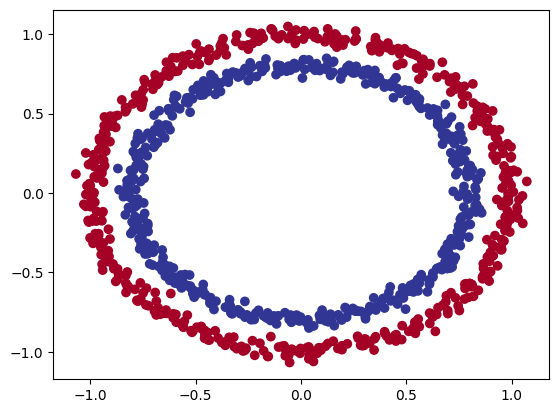

In [ ]:
# let's plot it
plt.scatter(circles["X0"], circles["X1"], c=y, cmap='RdYlBu');

From the plot we can observe that the problem we're going to solve is binary classification.

In [ ]:
# let's train the model but first need to split the train and test
from sklearn.model_selection import train_test_split

X = circles.drop(labels=['label'], axis=1)
y = circles['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((800, 2), (800,))

In [ ]:
# let's build a model
tf.random.set_seed(17)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit a model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0,
          validation_data=(X_test, y_test))

In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9860 - accuracy: 0.5200


[0.9859723448753357, 0.5199999809265137]

### Preprocess data to get it read for use in a model

Preprocessing means a series of functions to prepare your data for use with neural networks

### Use the models to predict results

We can take further the circle classification model and then make them predict, so let's build it once again.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'), # 1 hidden layer with activation function relu
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid for binary classification
])

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    verbose=0,
                    validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1218 - accuracy: 0.9800


[0.12180358171463013, 0.9800000190734863]

In [ ]:
# see the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# use the model to predict
import numpy as np

y_preds = model.predict(X_test)

y_preds = tf.round(y_preds)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
y_test[:10]

250    0
642    1
615    0
592    1
565    1
364    0
502    0
233    1
479    1
14     1
Name: label, dtype: int64

In [ ]:
# get the confusion matrix evaluation
tf.math.confusion_matrix(y_test, tf.round(y_preds)).numpy()

array([[97,  2],
       [ 2, 99]], dtype=int32)

### Build and Train Multi-class classification Model

For this we are going to import [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) multiclass classification dataset to build our model.

In [ ]:
# import the data
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# let's view the data and it's shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Here 28, 28 means the input is in 28 * 28 grayscale image

In [ ]:
train_data[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

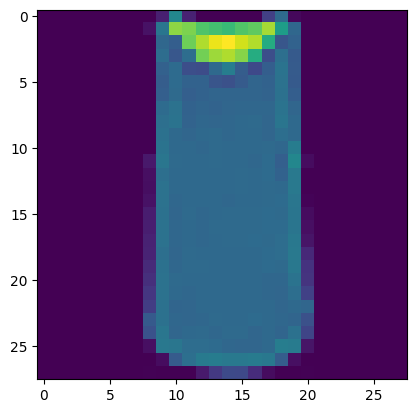

In [ ]:
# plot this
import matplotlib.pyplot as plt
plt.imshow(train_data[2]);

In [ ]:
train_labels[2]

0

Since these are some category or number, let's make this into human readable labels. Let's create a dataset for that as `class_names`

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
class_names[train_labels[2]]

'T-shirt/top'

In [ ]:
train_data[2].shape

(28, 28)

So now in this way can read the output of our train labels and test labels. Next, let's build the model.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2773 - accuracy: 0.1164 - val_loss: 2.2259 - val_accuracy: 0.1360
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1919 - accuracy: 0.1479 - val_loss: 2.1502 - val_accuracy: 0.1803
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7964 - accuracy: 0.2855 - val_loss: 1.6468 - val_accuracy: 0.3122
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5998 - accuracy: 0.3238 - val_loss: 1.5721 - val_accuracy: 0.3458
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5451 - accuracy: 0.3205 - val_loss: 1.5964 - val_accuracy: 0.3365
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5141 - accuracy: 0.3284 - val_loss: 1.4930 - val_accuracy: 0.3419
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4911 - accuracy: 0.3312 - val_loss: 1.4849 - val_accuracy

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We can normalize the inputs since the range of numbers in the input is between 0-256, so if we normalize and shrink it between 0-1 and try building our model again.

In [ ]:
train_data[2].max(), train_data[2].min()

(255, 0)

In [ ]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()


train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [ ]:
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

now let's build the model again

In [ ]:
# random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data_norm,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5639 - accuracy: 0.3257 - val_loss: 1.3515 - val_accuracy: 0.3942
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2372 - accuracy: 0.4614 - val_loss: 1.1834 - val_accuracy: 0.4896
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1224 - accuracy: 0.5170 - val_loss: 1.0773 - val_accuracy: 0.5523
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0088 - accuracy: 0.5853 - val_loss: 0.9707 - val_accuracy: 0.6051
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8920 - accuracy: 0.6530 - val_loss: 0.8630 - val_accuracy: 0.6654
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8360 - accuracy: 0.6708 - val_loss: 0.8397 - val_accuracy: 0.6669
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8119 - accuracy: 0.6779 - val_loss: 0.8374 - val_accuracy:

### Plot Loss and Accuracy curves

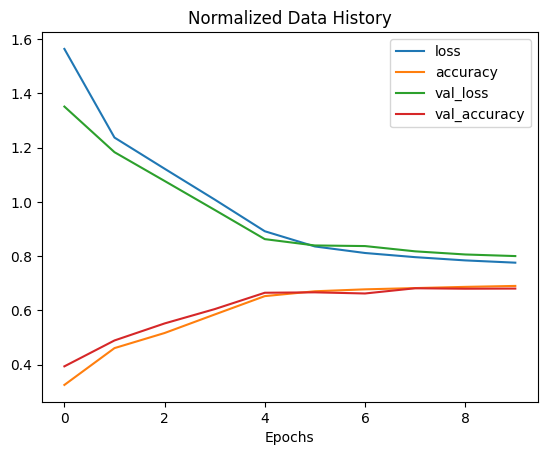

In [ ]:
pd.DataFrame(history.history).plot(title='Normalized Data History')
plt.xlabel("Epochs");

### Identify strategies to prevent overfitting, including augmentation and dropout

When we say, a model is **overfitting** it means that model is way good at learning the training dataset that when new data is sent for prediction it doesn't produces good results as compared to training dataset.

So there are some strategies which we can use to prevent overfitting like,
- Data augmentation during preprocessing the data or training the model.
- Also we can use dropout layers
- Add Regularization layers (such as MaxPool2D)
- Add more data..
- so on..




In [ ]:
# data augmentation
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.2),
# ])

# let build the model again and use data_augmentation as the layer of the network
model = tf.keras.Sequential([
    # data_augmentation,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data_norm,
                    train_labels,
                    epochs=20,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2438 - accuracy: 0.5658 - val_loss: 0.7931 - val_accuracy: 0.7103
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7014 - accuracy: 0.7335 - val_loss: 0.6720 - val_accuracy: 0.7423
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6381 - accuracy: 0.7544 - val_loss: 0.6454 - val_accuracy: 0.7544
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6119 - accuracy: 0.7627 - val_loss: 0.6310 - val_accuracy: 0.7494
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6000 - accuracy: 0.7671 - val_loss: 0.6173 - val_accuracy: 0.7574
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5892 - accuracy: 0.7689 - val_loss: 0.6088 - val_accuracy: 0.7626
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5808 - accuracy: 0.7736 - val_loss: 0.6077 - val_accuracy:

## (2) Image classification

You need to understand how to build image recognition and object detection models with deep neural
networks and convolutional neural networks using TensorFlow 2.x. You need to know how to:

- [ ] Define Convolutional neural networks with Conv2D and pooling layers.
- [ ] Build and train models to process real-world image datasets.
- [ ] Understand how to use convolutions to improve your neural network.
- [ ] Use real-world images in different shapes and sizes..
- [ ] Use image augmentation to prevent overfitting.
- [ ] Use ImageDataGenerator.
- [ ] Understand how ImageDataGenerator labels images based on the directory structure

In [ ]:
# let's import some helper functions

# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

--2023-07-07 04:48:47--  https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-07-07 04:48:48 (35.5 MB/s) - ‘helper_functions.py’ saved [2904/2904]



In [ ]:
# download some image data from tensorflow dataset
import tensorflow_datasets as tfds

# Load in the data
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files=False,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored